# 1. Scikit-learn
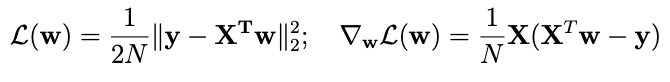

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [3]:
# create 500data near y = 4 + 3x
X = np.random.random(500)
y = 4 + 3*X + .5*np.random.random(500)

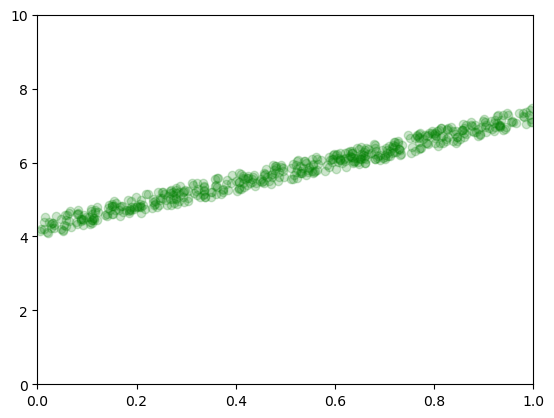

In [4]:
# alpha: transparent ratio
plt.scatter(X,y, color = 'green', alpha = 0.2)
plt.axis([0,1,0,10])
plt.show()

In [5]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

* The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [6]:
# y = b + w*x so we have [b,w]
b,w = lr.intercept_[0], lr.coef_[0][0]

# solution found by sklearn - b + w*x
print(b,w)

4.23605824557858 3.025477575894945


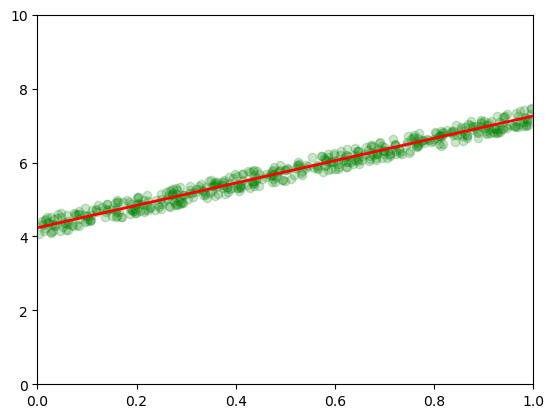

In [38]:
#create data
x = np.linspace(0,10,5)
plt.plot(x,4.23605824557858+3.025477575894945*x, color ='red', linewidth = 2)

plt.scatter(X,y, color = 'green', alpha = 0.2)
plt.axis([0,1,0,10])
plt.show()

# 2. GD  

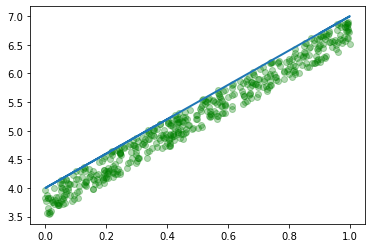

In [57]:
x = np.random.random(500)
y = 4 + 3*x + .5 * np.random.random(500)

%matplotlib inline
plt.scatter(x,y,alpha = 0.3, c = 'green')
plt.plot(x,4+3*x, linewidth =2 )
plt.axis('tight');

In [73]:
# bcs LR has bias so we have convert x to xbar: [1,x1...], and w=[w0,w1,...]
one = np.ones((x.shape[0],1))
Xbar = np.concatenate((one,x.reshape(-1,1)), axis = 1)
N = Xbar.shape[0]

Xbar.shape

(500, 2)

In [75]:
w0 = np.array([[2,3]]).T

w0.shape

(2, 1)

In [82]:
# grad
def grad(w):
    N = Xbar.shape[0]
    return 1/N * np.dot(Xbar.T,(np.dot(Xbar,w)-y))

#GDM
def GMD(w0,eta):
    list_w = [w0]
    for i in range(100):
        w_new = list_w[-1] - eta * grad(list_w)
        if grad(w_new) < 1e-3:
            break
        list_w.append(w_new)
    return list_w[-1]

print(GMD(w0,0.1))

ValueError: shapes (2,500) and (500,1,500) not aligned: 500 (dim 1) != 1 (dim 1)